In [323]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from helper import *

# Helper Functions

These functions train a model on your data and use cross validation to determine the average negative mean squared error. You do not have to edit these! However, it might make sense to add new helper functions here.

In [324]:
def scoreLinear(X, y):
    """Trains a linear regression model and evaluates it with 3-fold cross validation.
  
    Parameters: 
    X (array): Training data of shape (n_samples, n_features)
    y (array): Target values of shape (n_samples,)
  
    Returns: 
    Float: average score of the model after cross validation
    """
    regr = linear_model.LinearRegression()
    scores = cross_val_score(regr, X, y, cv=3, scoring='neg_mean_squared_error')
    return scores.mean()

In [325]:
def scoreBoosting(X, y):
    """Trains a gradient boosting model and evaluates it with 3-fold cross validation.
  
    Parameters: 
    X (array): Training data of shape (n_samples, n_features)
    y (array): Target values of shape (n_samples,)
  
    Returns: 
    Float: average score of the model after cross validation
    """
    clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=0, loss='ls')
    scores = cross_val_score(clf, X, np.ravel(y), cv=3, scoring='neg_mean_squared_error')
    return scores.mean()

In [326]:
def dataframeToXy(df, predict_column, feature_columns):
    """Convert the dataframe to a format usable for the ML algorithms"""
    X = df[feature_columns].values.reshape(-1, df[feature_columns].shape[1]) # all features
    y = df[[predict_column]].values.reshape(-1, 1) # values to predict
    return X, y

In [327]:
def runScoring(df, predict_column, feature_columns):
    """This runs both algorithms to determine the scores for all given features in the dataset.
    
    Parameters: 
    df (dataframe): dataframe with Score and features
    predict_column: name of the value to predict, e.g. 'Score'
    feature_columns: list of all column names that are to be used as features
  
    Returns: 
    linear: negative mean squared error of linear regression
    boost: negative mean squared error of boosting algorithm
    """
    X, y = dataframeToXy(df, predict_column, feature_columns)
    boost = scoreBoosting(X, y)
    linear = scoreLinear(X, y)
    return linear, boost

In [328]:
def runScoringSimple(df, predict_column):
    """Alternative to function above, this takes all the columns in the 
    dataframe as features except the single column which is used for the score.
    """
    all_feature_columns = list(df.columns)
    all_feature_columns.remove(predict_column)
    return runScoring(df, predict_column, all_feature_columns)

In [329]:
def createBaselineRandom(df, predict_column):
    """creates random features and returns the average score after 20 rounds"""
    np.random.seed(0)
    baseline = df[['Score']].copy()
    averageLinearScore = 0
    averageBoostingScore = 0
    rounds = 20
    for i in range(rounds):
        baseline['feature1'] = np.random.randint(0, 100, df.shape[0])
        baseline['feature2'] = np.random.randint(0, 100, df.shape[0])
        baseline['feature3'] = np.random.randint(0, 100, df.shape[0])
        lin, boost = runScoring(baseline, predict_column, ['feature1', 'feature2', 'feature3'])
        averageLinearScore += lin / rounds
        averageBoostingScore += boost / rounds
    print(f'linear   : {averageLinearScore}')
    print(f'boosting : {averageBoostingScore}')

# Load Data

Recommended: Make sure you have a column named 'Score', preferably as the first column, while the name of the municipality is the index.


In [330]:


# TODO: REPLACE THIS WITH YOUR OWN DATA
demodata = {'Gemeinde': ['Neverwinter','Novigrad','Rapture','Lothric','Los Santos','City 17','The Citadel','New Vegas', 'Pallet Town','Grestin'],
        'Score': [90,82,75,50,42,32,15,9,8,2],
        'feature1': [1200, 400, 700, 730, 640, 500, 180, 210, 80, 10]
        }
df = pd.DataFrame(demodata).set_index('Gemeinde')

ranking = pd.read_csv('safety-ranking.csv', index_col=0)
ranking

,Score,Total Anzahl Personen Sozialhilfe,Total Verunfallte Personen,Total Anzahl Unfälle 2021
Gemeinde,,,,
Doppleschwand,0.000000,0.0,0.0,0.0
Honau,0.089783,0.0,1.0,1.0
Romoos,0.161609,0.0,3.0,0.0
Flühli,0.215479,7.0,1.0,1.0
Vitznau,0.233435,9.0,0.0,2.0
...,...,...,...,...
Horw,10.055665,351.0,29.0,61.0
Ebikon,15.550368,443.0,69.0,108.0
Kriens,27.024600,1004.0,73.0,141.0


Safety Ranking wurde gewählt und eingelesen.

These are the features that were used to create the original ranking in Assignment 1:
- Total Verunfallte pro 1000 Einwohner
- Total Anzahl Unfälle 2021
- Total Anzahl Personen Sozialhilfe
**TODO: Please write down your original features here!**


In [331]:
# TODO: Write down your original features here!

# Get a first baseline for your model with random values

In [332]:
# This code creates a baseline for your model, using random features
createBaselineRandom(ranking, 'Score')

C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and 

linear   : -174.09733300234578
boosting : -267.36629876029264


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


**WARNING**: This uses the same dataframe for both the linear model and the boosting model. In your code you will want to use different ones for the different models. Your goal is to get both of these scores to as close as 0 as possible and most likely you will need to do different steps for linear regression and for gradient boosting and therefore have different features.

# LOAD COORDINATES HERE

# Get a second baseline by using all features you have

In [344]:
# this assumes we have a dataframe with a column named Score and all other columns are features.
# You might have to change this code if your dataframe looks different.

df2 = pd.read_csv('asn2.csv', index_col=0, header=0, sep=',', encoding='utf-8')
# mach Gemeinde zu Index
df2 = df2.set_index('Gemeindename')
df2['Score'] = ranking['Score']

df2 = df2.drop(columns=['Ortschaftsname'])
df2 = df2.drop(columns=['Total Verunfallte Personen'])
df2 = df2.drop(columns=['Total Anzahl Unfälle 2021'])
df2 = df2.drop(columns=['Total Anzahl Personen Sozialhilfe'])
# lies ans2_2.csv in ein dataframe ein und füge 'Leerwohnungsziffer' dem df2 hinzu
df3 = pd.read_csv('asn2_2.csv', index_col=0, header=0, sep=',', encoding='utf-8')
# mach in df2 eine neue Spalte 'Leerwohnungsziffer' und füge die Werte aus df3 hinzu
df2['Leerwohnungs-ziffer'] = df3['Leerwohnungs-ziffer']

df2['Rohe Sterbeziffer'] = df3['Rohe Sterbeziffer']
df2['Ausländer in %'] = df3['Ausländer in %']
df2['Durchschnittliche Haushaltsgrösse in Personen'] = df3['Durchschnittliche Haushaltsgrösse in Personen']
df2['Anzahl Privathaushalte'] = df3['Anzahl Privathaushalte']
df2['Rohe Sterbeziffer'] = df3['Rohe Sterbeziffer']
df2['Rohe Scheidungsziffer'] = df3['Rohe Scheidungsziffer']
df2['0-19 Jahre'] = df3['0-19 Jahre']
df2['20-64 Jahre'] = df3['20-64 Jahre']
df2['65 Jahre und mehr'] = df3['65 Jahre und mehr']
df2 = df2.drop(columns=['Alter 0-17'])
df2 = df2.drop(columns=['Alter 18-64'])
df2 = df2.drop(columns=['Alter 65+'])

df2.to_csv('allfeatures.csv', sep=',', encoding='utf-8')


linear, boost = runScoringSimple(df2, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

df2

linear   : -0.9332859897535978
boosting : -71.3190715536545


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


,Score,Total Anzahl Dossiers,Total Sozialhilfequote,Total Sozialhilfequote Schweizer,Total Sozialhilfequote Ausländer,obligatorische Schule,sekundarstufe I,tertiärstufe,Personenschaden absolut mit Personenschaden,Personenschaden pro 1000 Einwohner,...,Distanz zu nächsten Prontoshop in km,Leerwohnungs-ziffer,Rohe Sterbeziffer,Ausländer in %,Durchschnittliche Haushaltsgrösse in Personen,Anzahl Privathaushalte,Rohe Scheidungsziffer,0-19 Jahre,20-64 Jahre,65 Jahre und mehr
Gemeindename,,,,,,,,,,,,,,,,,,,,,
Adligenswil,1.203089,29.0,0.8,0.4,3.6,0.0,0.2,0.0,3,0.5,...,0.969228,0.290818,6.082389,10.970696,2.405945,2254.0,1.658833,21.666667,55.054945,23.278388
Aesch,0.520740,10.0,0.9,0.9,0.6,0.0,0.0,0.0,1,0.8,...,10.666998,0.756430,6.387226,12.708499,2.263254,547.0,1.596806,18.506751,62.986497,18.506751
Alberswil,0.700305,5.0,1.4,1.0,3.3,0.0,0.0,0.0,4,6.0,...,6.701790,7.028754,6.056018,12.898331,2.438662,269.0,1.514005,19.575114,69.347496,11.077390
Altbüron,0.718262,12.0,2.5,2.1,2.7,0.0,0.0,0.0,1,1.0,...,8.440348,2.895323,6.941001,10.968379,2.562660,391.0,0.991572,20.750988,63.537549,15.711462
Altishofen,1.005567,17.0,1.3,0.5,5.3,0.0,0.0,0.0,5,2.5,...,2.059905,2.732919,6.642821,15.620214,2.643251,726.0,1.021972,24.910669,62.582950,12.506381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Honau,0.089783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.4,...,2.679949,0.584795,0.000000,7.231920,2.642384,151.0,5.025126,21.945137,67.082294,10.972569
Rain,1.490393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,4.1,...,4.455348,0.511509,3.547357,6.640763,2.586937,1087.0,0.709471,25.821265,60.649947,13.528788
Romoos,0.161609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,6.700320,0.874636,9.056604,2.579666,2.549407,253.0,3.018868,22.003035,59.787557,18.209408


# lineare Regression Engineering

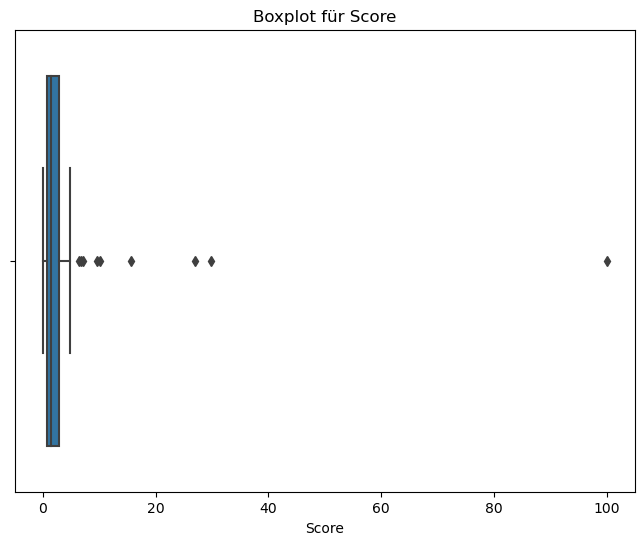

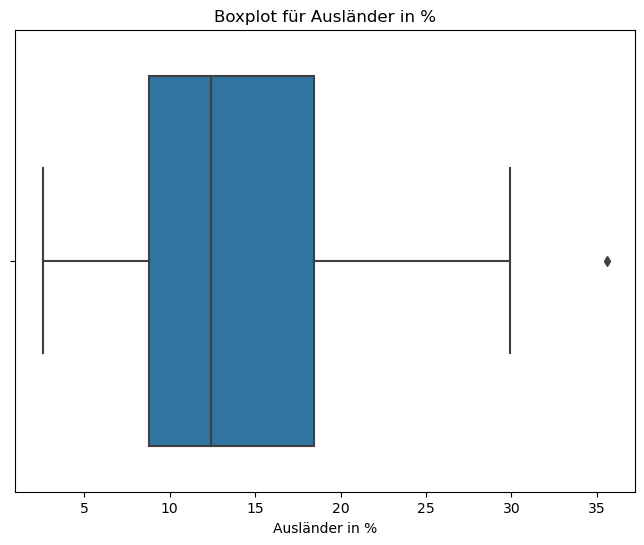

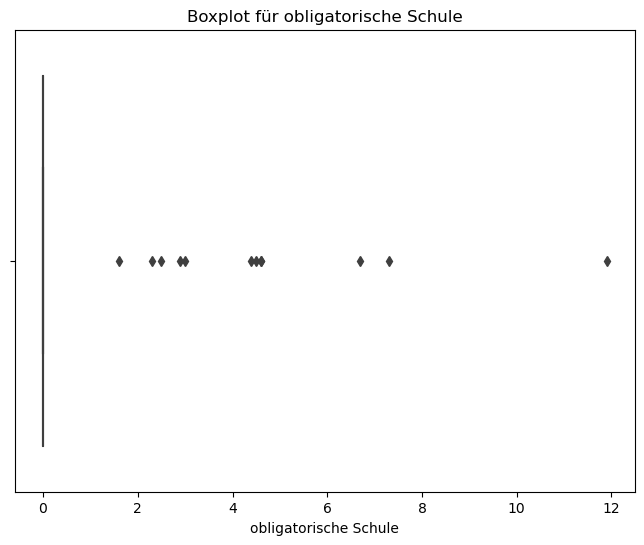

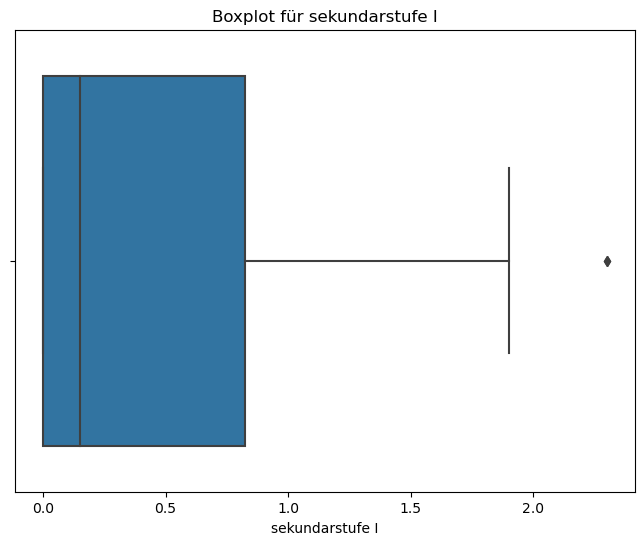

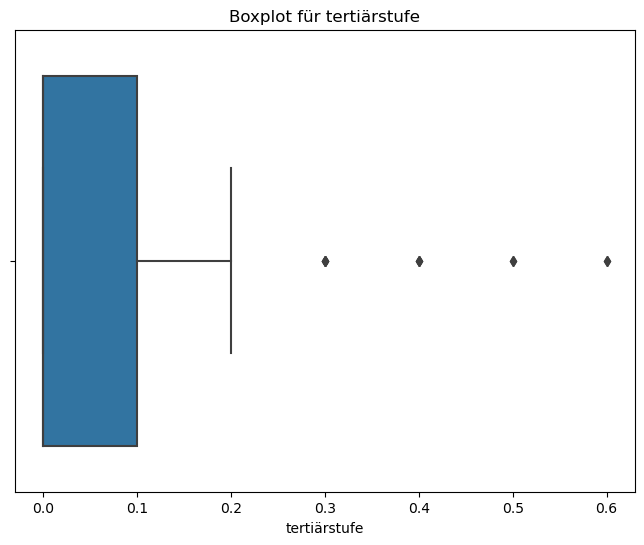

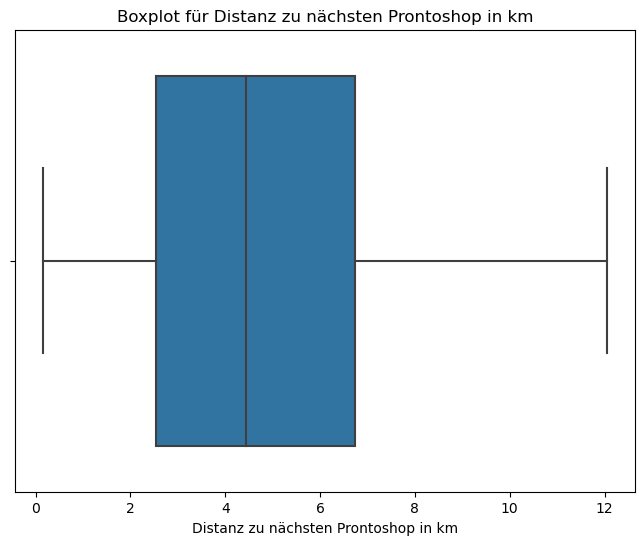

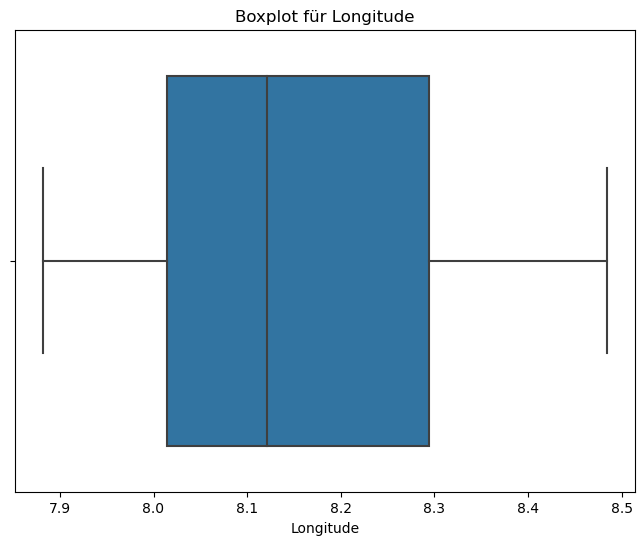

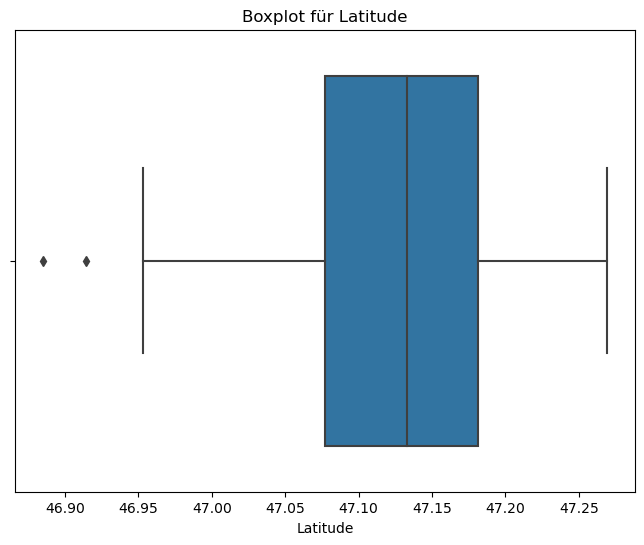

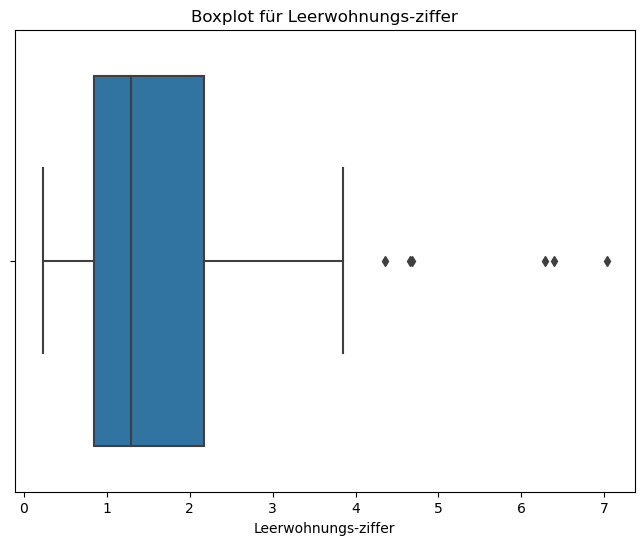

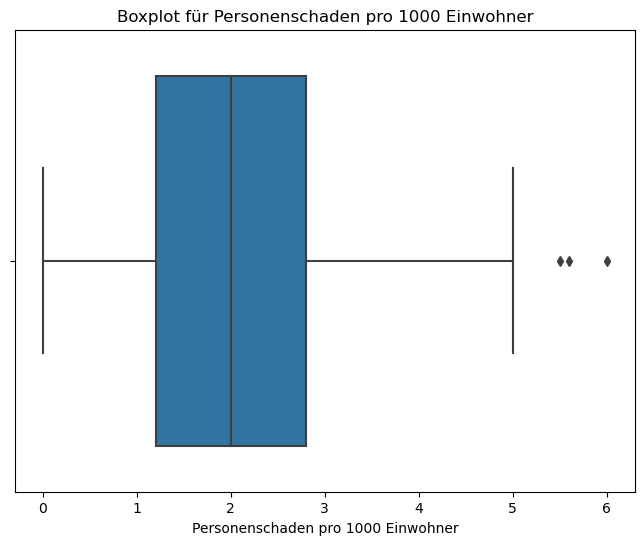

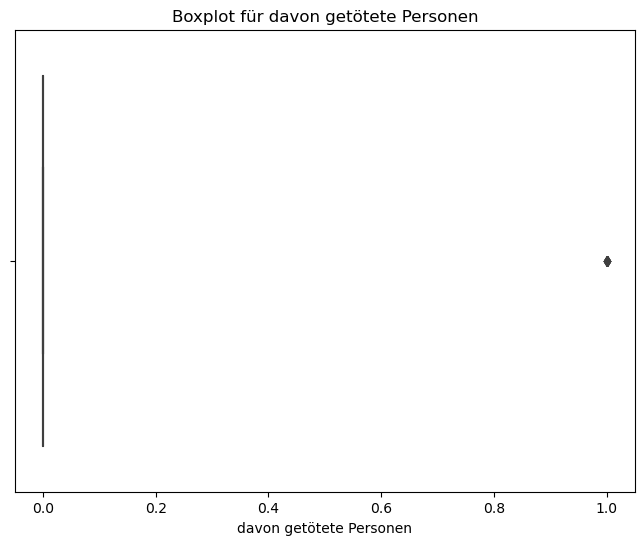

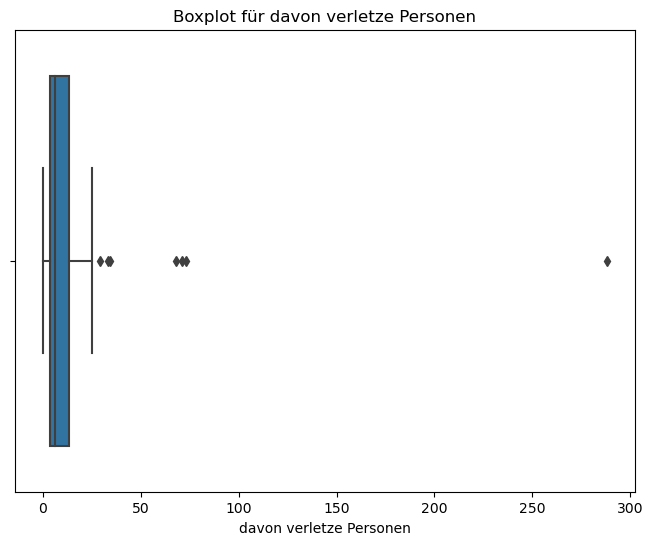

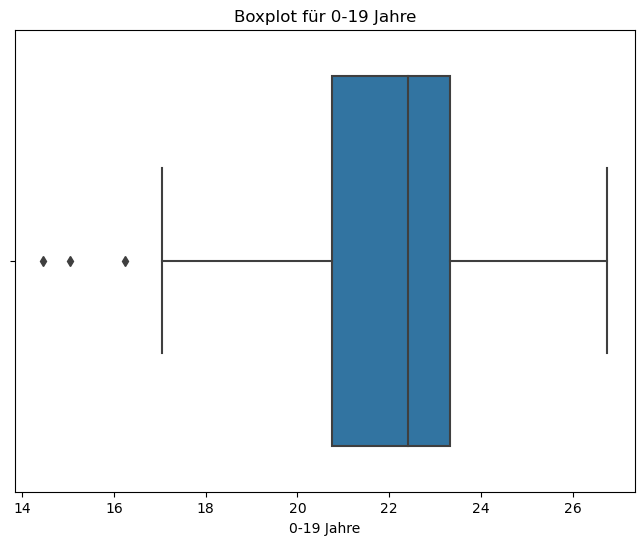

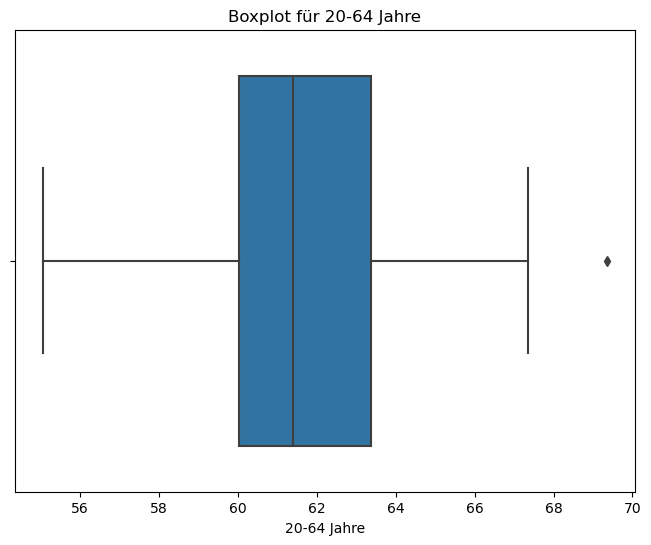

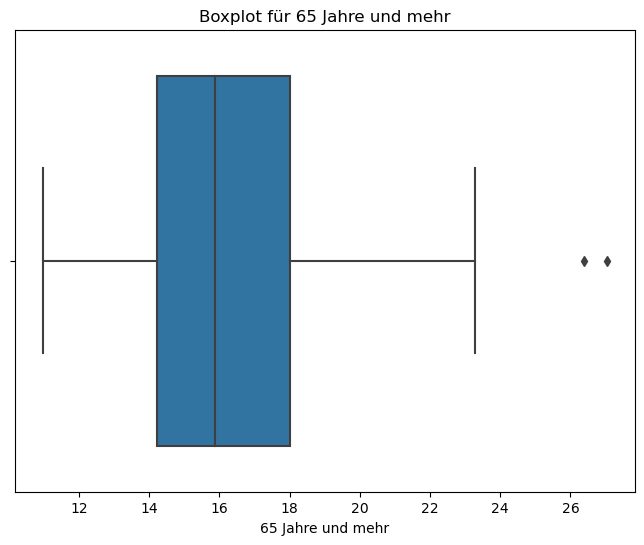

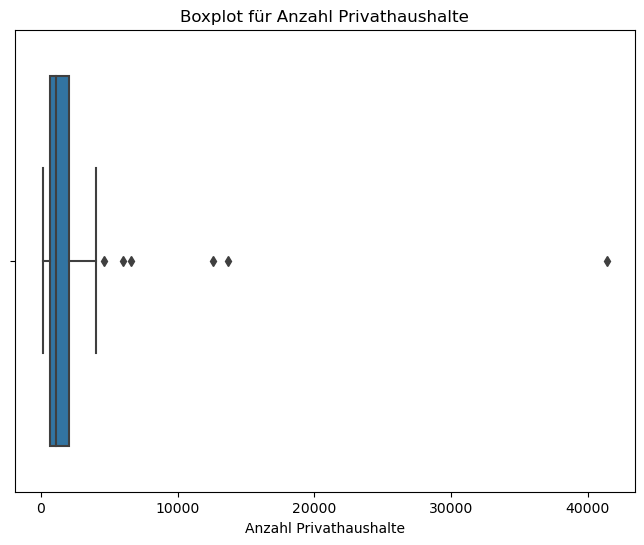

linear   : -1.0452038362334473
boosting : -80.2229231226063


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [385]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



features = ['Score','Ausländer in %', 'obligatorische Schule', 'sekundarstufe I', 'tertiärstufe', 'Distanz zu nächsten Prontoshop in km', 'Longitude', 'Latitude', 'Leerwohnungs-ziffer', 'Personenschaden pro 1000 Einwohner', 'davon getötete Personen', 'davon verletze Personen', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr', 'Anzahl Privathaushalte']

lin_df = df2[features]

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title('Boxplot für {}'.format(feature))
    plt.show()

linear, boost = runScoringSimple(lin_df, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

Keine Outliers gefunden die entfernt werden müssen.


In [378]:
# Ein Teil der Spalten normalisieren, auch wenn alle Spalten normalisiert werden, wird das Score von linear nicht besser.
cols_to_normalize = ['Distanz zu nächsten Prontoshop in km', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr']
lin_df[cols_to_normalize] = (lin_df[cols_to_normalize] - lin_df[cols_to_normalize].min()) / (lin_df[cols_to_normalize].max() - lin_df[cols_to_normalize].min())

linear, boost = runScoringSimple(lin_df, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

C:\Users\Fabio\AppData\Local\Temp\ipykernel_29804\4249422508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_df[cols_to_normalize] = (lin_df[cols_to_normalize] - lin_df[cols_to_normalize].min()) / (lin_df[cols_to_normalize].max() - lin_df[cols_to_normalize].min())
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\skle

linear   : -1.0452140101582765
boosting : -80.2229231226063


0-19 Jahre                             -0.356461
Distanz zu nächsten Prontoshop in km   -0.288036
Latitude                               -0.158034
Leerwohnungs-ziffer                    -0.044609
20-64 Jahre                             0.083901
Personenschaden pro 1000 Einwohner      0.104257
Longitude                               0.175628
65 Jahre und mehr                       0.191795
davon getötete Personen                 0.320530
Ausländer in %                          0.335416
tertiärstufe                            0.462816
sekundarstufe I                         0.550107
obligatorische Schule                   0.837120
davon verletze Personen                 0.988850
Anzahl Privathaushalte                  0.994035
Score                                   1.000000
Name: Score, dtype: float64

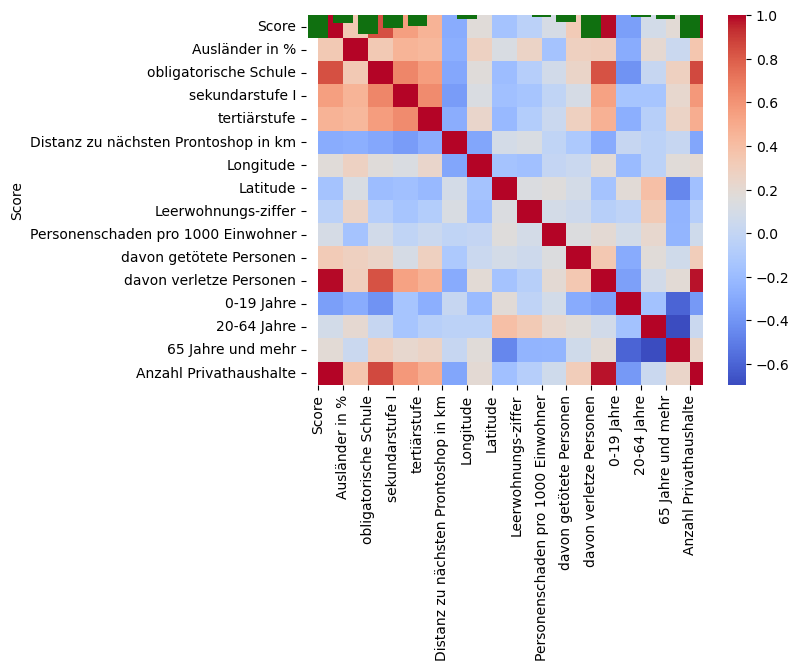

In [379]:
# Korrelationsanalyse
corr_matrix = lin_df.corr(method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm')
sns.barplot(x=corr_matrix.columns, y=corr_matrix.loc['Score',:], color='g')
corr_matrix.loc['Score',:].sort_values()

Nach dieser Analyse fliegen folgende Features heraus:
- Longitude
- Leerwohnungs-ziffer
- 20-64 Jahre (alle 3 Features korrelieren wenig mit dem Score)
- Latitude (korreliert stark mit Longitude)
- Anzahl Privathaushalte (korreliert stark mit Score)
- davon verletze Personen (korreliert stark mit Score)

In [380]:
lin_df = lin_df.drop(columns=['Longitude'])
lin_df = lin_df.drop(columns=['Latitude'])
lin_df = lin_df.drop(columns=['Leerwohnungs-ziffer'])
lin_df = lin_df.drop(columns=['20-64 Jahre'])
#lin_df = lin_df.drop(columns=['0-19 Jahre'])
#lin_df = lin_df.drop(columns=['Distanz zu nächsten Prontoshop in km'])

linear, boost = runScoringSimple(lin_df, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')


linear   : -1.0588588936686623
boosting : -85.66495750751234


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [382]:
# Score wird selten bis nie mehr besser. Jetzt wird veruscht die 5 besten Features zu finden
features = lin_df.columns.tolist()

features

estimator = linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=5)

_ = selector.fit(lin_df[features], lin_df['Score'])
print([f for f, b in zip(features, selector.support_) if b])
selector.score(lin_df[features], lin_df['Score'])

linear, boost = runScoringSimple(lin_df, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

['Score', 'tertiärstufe', 'Distanz zu nächsten Prontoshop in km', '0-19 Jahre', '65 Jahre und mehr']
linear   : -1.0588588936686623
boosting : -85.66495750751234


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


Festellung: nach dem normalisieren der Spalten wurde das Score von linear ein wenig schlechter! --> weiter mit Korrelationsanalyse

In [367]:
features_df2 = df2.columns.tolist()
print(features_df2)
df4 = df2[['Score','Ausländer in %', 'Durchschnittliche Haushaltsgrösse in Personen', 'Anzahl Privathaushalte', 'Rohe Sterbeziffer', 'Rohe Scheidungsziffer','Distanz zu nächsten Prontoshop in km']]
# mache liste aus Columnnamen
features_df4 = df4.columns.tolist()
print(features_df4)

['Score', 'Total Anzahl Dossiers', 'Total Sozialhilfequote', 'Total Sozialhilfequote Schweizer', 'Total Sozialhilfequote Ausländer', 'obligatorische Schule', 'sekundarstufe I', 'tertiärstufe', 'Personenschaden absolut mit Personenschaden', 'Personenschaden pro 1000 Einwohner', 'Durchschnitt Anzahl 2017-2021', 'davon getötete Personen', 'davon verletze Personen', 'Lenker/innen', 'Mitfahrer/innen', 'Fussgänger/innen', 'Fahrzeugähnliche Geräte', 'Rank', 'Longitude', 'Latitude', 'Distanz zu nächsten Prontoshop in km', 'Leerwohnungs-ziffer', 'Rohe Sterbeziffer', 'Ausländer in %', 'Durchschnittliche Haushaltsgrösse in Personen', 'Anzahl Privathaushalte', 'Rohe Scheidungsziffer', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr', 'distance_normalizedminmax']
['Score', 'Ausländer in %', 'Durchschnittliche Haushaltsgrösse in Personen', 'Anzahl Privathaushalte', 'Rohe Sterbeziffer', 'Rohe Scheidungsziffer', 'Distanz zu nächsten Prontoshop in km']


In [335]:
linear, boost = runScoringSimple(df4, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

linear   : -2.4694451904181665
boosting : -76.64709336813404


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


#Do your own feature engineering here

Your goal is to find the right features to get both scores as close to 0 as possible. Add more columns to your dataframe and choose which ones of those you will use for the machine learning models. Use the methods discussed in class to improve your results even further.

# Feature Transformations

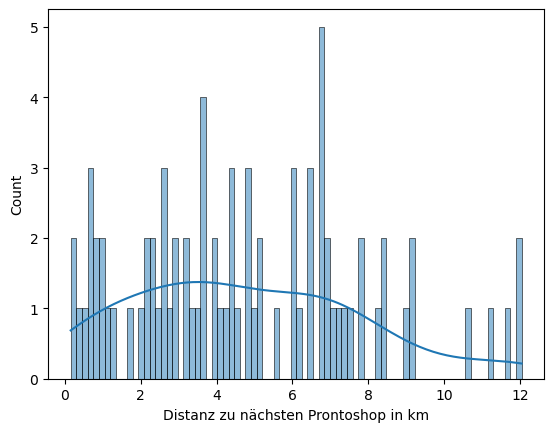

<Figure size 640x480 with 0 Axes>

In [336]:
sns.histplot(df2['Distanz zu nächsten Prontoshop in km'], bins=80, kde=True);
fig = plt.figure()

,Score,Total Anzahl Dossiers,Total Sozialhilfequote,Total Sozialhilfequote Schweizer,Total Sozialhilfequote Ausländer,obligatorische Schule,sekundarstufe I,tertiärstufe,Personenschaden absolut mit Personenschaden,Personenschaden pro 1000 Einwohner,...,Leerwohnungs-ziffer,Rohe Sterbeziffer,Ausländer in %,Durchschnittliche Haushaltsgrösse in Personen,Anzahl Privathaushalte,Rohe Scheidungsziffer,0-19 Jahre,20-64 Jahre,65 Jahre und mehr,distance_normalizedminmax
Gemeindename,,,,,,,,,,,,,,,,,,,,,
Adligenswil,1.203089,29.0,0.8,0.4,3.6,0.0,0.2,0.0,3,0.5,...,0.290818,6.082389,10.970696,2.405945,2254.0,1.658833,21.666667,55.054945,23.278388,0.068422
Aesch,0.520740,10.0,0.9,0.9,0.6,0.0,0.0,0.0,1,0.8,...,0.756430,6.387226,12.708499,2.263254,547.0,1.596806,18.506751,62.986497,18.506751,0.884137
Alberswil,0.700305,5.0,1.4,1.0,3.3,0.0,0.0,0.0,4,6.0,...,7.028754,6.056018,12.898331,2.438662,269.0,1.514005,19.575114,69.347496,11.077390,0.550609
Altbüron,0.718262,12.0,2.5,2.1,2.7,0.0,0.0,0.0,1,1.0,...,2.895323,6.941001,10.968379,2.562660,391.0,0.991572,20.750988,63.537549,15.711462,0.696845
Altishofen,1.005567,17.0,1.3,0.5,5.3,0.0,0.0,0.0,5,2.5,...,2.732919,6.642821,15.620214,2.643251,726.0,1.021972,24.910669,62.582950,12.506381,0.160163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Honau,0.089783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.4,...,0.584795,0.000000,7.231920,2.642384,151.0,5.025126,21.945137,67.082294,10.972569,0.212317
Rain,1.490393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,4.1,...,0.511509,3.547357,6.640763,2.586937,1087.0,0.709471,25.821265,60.649947,13.528788,0.361652
Romoos,0.161609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.874636,9.056604,2.579666,2.549407,253.0,3.018868,22.003035,59.787557,18.209408,0.550485


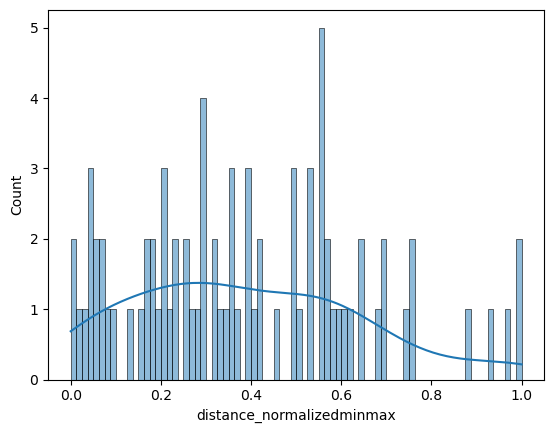

<Figure size 640x480 with 0 Axes>

In [346]:
# normalize column 'Distanz zu nächsten Prontoshop in km' with min-max normalization
# neue kolone distance_normalized
df2['distance_normalizedminmax'] = (df2['Distanz zu nächsten Prontoshop in km'] - df2['Distanz zu nächsten Prontoshop in km'].min()) / (df2['Distanz zu nächsten Prontoshop in km'].max() - df2['Distanz zu nächsten Prontoshop in km'].min())

sns.histplot(df2['distance_normalizedminmax'], bins=80, kde=True);
fig = plt.figure()
df2

In [347]:
df4 = df2[['Score','Ausländer in %', 'Durchschnittliche Haushaltsgrösse in Personen', 'Anzahl Privathaushalte', 'Rohe Sterbeziffer', 'Rohe Scheidungsziffer','distance_normalizedminmax']]
# mache liste aus Columnnamen
features_df4 = df4.columns.tolist()
print(features_df4)

['Score', 'Ausländer in %', 'Durchschnittliche Haushaltsgrösse in Personen', 'Anzahl Privathaushalte', 'Rohe Sterbeziffer', 'Rohe Scheidungsziffer', 'distance_normalizedminmax']


In [348]:
linear, boost = runScoringSimple(df4, 'Score')
print(f'linear   : {linear}')
print(f'boosting : {boost}')

linear   : -2.4694451904175097
boosting : -76.64709336813404


C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [338]:
# normalize column 'Distanz zu nächsten Prontoshop in km' with z-score normalization
# neue kolone distance_normalized
df2['distance_log'] = np.log(df2['Distanz zu nächsten Prontoshop in km'])
df2['distance_log']


Gemeindename
Adligenswil   -0.031255
Aesch          2.367155
Alberswil      1.902375
Altbüron       2.133024
Altishofen     0.722660
                 ...   
Honau          0.985798
Rain           1.494105
Romoos         1.902155
Schenkon       0.880961
Schlierbach    1.787006
Name: distance_log, Length: 80, dtype: float64

# Feature Combination
Welche Features können zusammengelegt werden?

# Feature-Selection:
Korrelationskoeffizienten der einzelnen Features

In [342]:
features = df2.columns.tolist()

features

estimator = linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=10)

_ = selector.fit(df2[features], df2['Score'])
print([f for f, b in zip(features, selector.support_) if b])
selector.score(df2[features], df2['Score'])

['Score', 'davon getötete Personen', 'davon verletze Personen', 'Lenker/innen', 'Mitfahrer/innen', 'Fussgänger/innen', 'Fahrzeugähnliche Geräte', '0-19 Jahre', '20-64 Jahre', '65 Jahre und mehr']


1.0

Durchschnittliche Haushaltsgrösse in Personen   -0.535812
0-19 Jahre                                      -0.356461
Distanz zu nächsten Prontoshop in km            -0.288036
Latitude                                        -0.158034
Leerwohnungs-ziffer                             -0.044609
Rohe Scheidungsziffer                           -0.008401
20-64 Jahre                                      0.083901
Personenschaden pro 1000 Einwohner               0.104257
Longitude                                        0.175628
65 Jahre und mehr                                0.191795
Rohe Sterbeziffer                                0.237419
Total Sozialhilfequote Ausländer                 0.275612
davon getötete Personen                          0.320530
Ausländer in %                                   0.335416
Rank                                             0.433951
tertiärstufe                                     0.462816
Total Sozialhilfequote Schweizer                 0.491347
Total Sozialhi

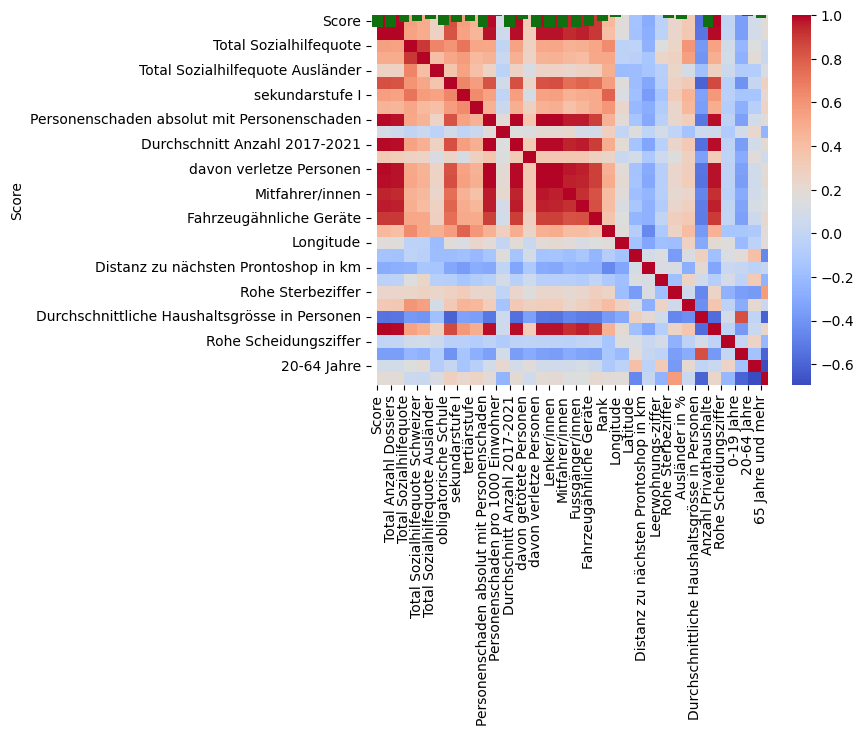

In [343]:
df = pd.read_csv('allfeatures.csv', index_col=0, header=0, sep=',', encoding='utf-8')
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, cmap='coolwarm')
sns.barplot(x=corr_matrix.columns, y=corr_matrix.loc['Score',:], color='g')
corr_matrix.loc['Score',:].sort_values()

Jede Spalte einzeln entfernen und die Verbesserung der Scores anschauen:
- bestes Score wenn Spalte 'obligatorische Schule' entfernt wird

In [ ]:
df = pd.read_csv('allfeatures.csv', index_col=0, header=0, sep=',', encoding='utf-8')

features = df.columns.tolist()
features.remove('Score')

for i, col in enumerate(features):
    df_temp = df.drop(col, axis=1)

    linear, boost = runScoringSimple(df_temp, 'Score')
    print(f'Score ohne Spalte {i+1} ({col}):')
    print(f'linear   : {linear}')
    print(f'boosting : {boost}')

In [ ]:
'''features = df.columns.tolist()
features.remove('Score')

# Liste, um die Verbesserung in der Score aufzunehmen
score_improvements = []

for i, col in enumerate(features):
    df_temp = df.drop(col, axis=1)

    linear, boost = runScoringSimple(df_temp, 'Score')
    score_difference = abs(linear - boost)
    score_improvements.append(score_difference)
    print(f'Score ohne Spalte {i+1} ({col}):')
    print(f'linear   : {linear}')
    print(f'boosting : {boost}')
    print(f'Score-Verbesserung: {score_difference}')

# Finden Sie das Feature mit der größten Score-Verbesserung
best_feature_index = score_improvements.index(max(score_improvements))
best_feature = features[best_feature_index]
print(f'Bestes Feature zum Entfernen: {best_feature}')

# Entfernen Sie das Feature mit der größten Score-Verbesserung
features.remove(best_feature)

# Wiederholen Sie den Vorgang bis nur noch 10 Features übrig sind
while len(features) > 10:
    score_improvements = []
    for i, col in enumerate(features):
        df_temp = df.drop(col, axis=1)

        linear, boost = runScoringSimple(df_temp, 'Score')
        score_difference = abs(linear - boost)
        score_improvements.append(score_difference)
        print(f'Score ohne Spalte {i+1} ({col}):')
        print(f'linear   : {linear}')
        print(f'boosting : {boost}')
        print(f'Score-Verbesserung: {score_difference}')

    # Finden Sie das Feature mit der größten Score-Verbesserung
    best_feature_index = score_improvements.index(max(score_improvements))
    best_feature = features[best_feature_index]
    print(f'Bestes Feature zum Entfernen: {best_feature}')

    # Entfernen Sie das Feature mit der größten Score-Verbesserung
    features.remove(best_feature)

# Drucken Sie die endgültige Liste der verbleibenden Features
print(f'Endgültige Featureliste: {features}')'''


In [ ]:
# Erstellen Sie eine reduzierte Version des ursprünglichen Dataframes mit den verbleibenden Features
reduced_df = df[features + ['Score']]

# Berechnen Sie den Score mit der reduzierten Featureliste
linear_score, boosting_score = runScoringSimple(reduced_df, 'Score')

print('Endgültige Featureliste:')
print(features)
print(f'Linearer Score: {linear_score}')
print(f'Boosting Score: {boosting_score}')